<a href="https://colab.research.google.com/github/WaRinz/ProbStat_asm/blob/main/%5BProbStat%5DArabica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [ ]:
pip install sklearn

In [ ]:
pip install category_encoders

In [ ]:
pip install stemgraphic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,15)})

In [ ]:
csv_file = "/content/arabica_data_cleaned.csv"
df = pd.read_csv(csv_file)
df['Aftertaste']

0       8.67
1       8.50
2       8.42
3       8.42
4       8.25
        ... 
1306    6.25
1307    6.42
1308    6.33
1309    6.67
1310    0.00
Name: Aftertaste, Length: 1311, dtype: float64

In [ ]:
data_clean = []
for i in range(0,1310):
  if(df['Aftertaste'][i] > 6.755 and df['Aftertaste'][i]<8.075):
    data_clean.append(int(df['Aftertaste'][i]))

In [ ]:
pip install empiricaldist

In [ ]:
from empiricaldist import Pmf
import numpy as np
import scipy.stats as st
import statistics
import matplotlib
mu = np.mean(data_clean)
print('mean', mu)
se = st.sem(data_clean)
print('se', se)
sd = np.std(data_clean)
print('sd', sd)

cl_90 = st.norm.interval(alpha = 0.90, loc = mu, scale = se)
cl_95 = st.norm.interval(alpha = 0.95, loc = mu, scale = se)
cl_99 = st.norm.interval(alpha = 0.99, loc = mu, scale = se)

print(cl_90)
print(cl_95)
print(cl_99)

mean 6.963295269168026
se 0.008051019484938103
sd 0.2817856819728336
(6.950052520567569, 6.976538017768483)
(6.947515560938717, 6.979074977397335)
(6.942557217255279, 6.984033321080773)


Text(0.5, 1.0, 'Confidence Interval(CI) of Mean : Aftertaste')

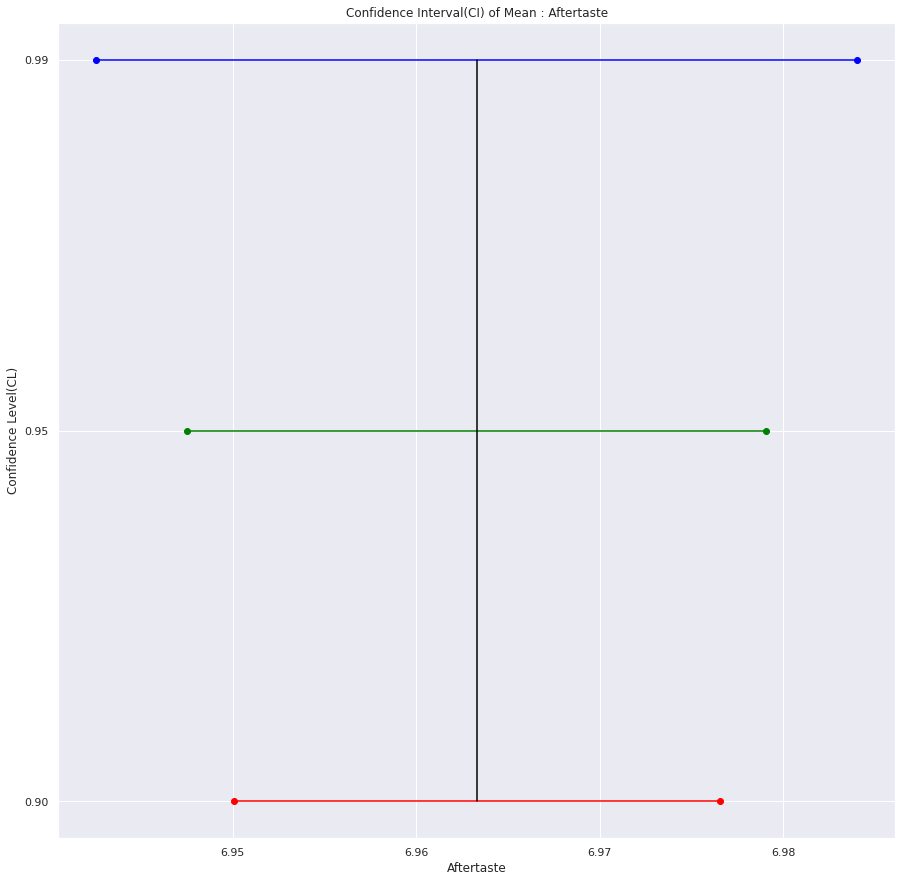

In [ ]:
data_dict = {}
data_dict['cl'] = ['0.90', '0.95', '0.99']
data_dict['lower'] = [cl_90[0], cl_95[0], cl_99[0]]
data_dict['upper'] = [cl_90[1], cl_95[1], cl_99[1]]
dataset = pd.DataFrame(data_dict)
data_color = ['red', 'green', 'blue']

for lower, upper, y, color, in zip(dataset['lower'], dataset['upper'], range(len(dataset)), data_color):
  plt.plot((lower, upper), (y, y), 'ro-', color = color)
plt.yticks(range(len(dataset)),list(dataset['cl']))


point1 = [mu,0]
point2 = [mu,2]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color='black')
plt.xlabel("Aftertaste")
plt.ylabel("Confidence Level(CL)")
plt.title("Confidence Interval(CI) of Mean : Aftertaste")


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning:

invalid value encountered in multiply



Text(0.5, 1.0, 'Aftertaste Confidence Level = 90% ')

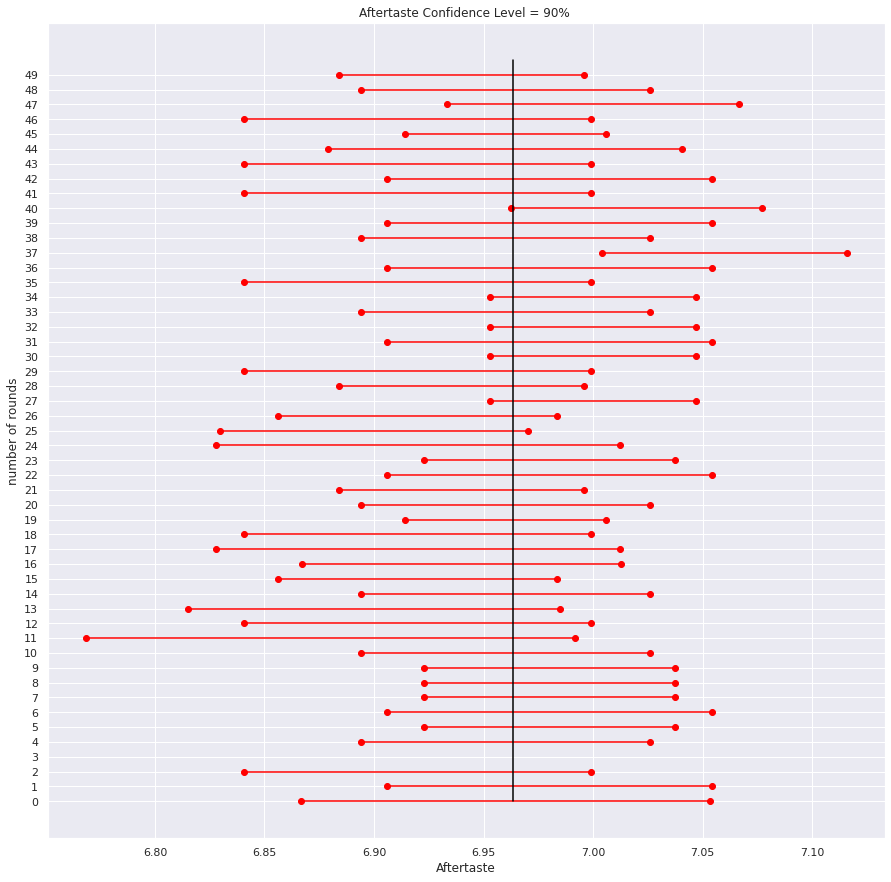

In [ ]:
import random
rounds = 50
data_dict_90 = {}
data_dict_90['cl'] = list(range(0, 50))
data_dict_90['lower'] = []
data_dict_90['upper'] = []

data_dict_95 = {}
data_dict_95['cl'] = list(range(0, 50))
data_dict_95['lower'] = []
data_dict_95['upper'] = []

data_dict_99 = {}
data_dict_99['cl'] = list(range(0, 50))
data_dict_99['lower'] = []
data_dict_99['upper'] = []

for x in range(0, rounds):
  List = data_clean
  UpdateList = random.sample(List, rounds)

  cl_90 = st.norm.interval(alpha = 0.9, 
        loc = np.mean(UpdateList),
        scale = st.sem(UpdateList))
  data_dict_90['lower'].append(cl_90[0])
  data_dict_90['upper'].append(cl_90[1])

  cl_95 = st.norm.interval(alpha = 0.95, 
        loc = np.mean(UpdateList),
        scale = st.sem(UpdateList))
  data_dict_95['lower'].append(cl_95[0])
  data_dict_95['upper'].append(cl_95[1])

  cl_99 = st.norm.interval(alpha = 0.99, 
        loc = np.mean(UpdateList),
        scale = st.sem(UpdateList))
  data_dict_99['lower'].append(cl_99[0])
  data_dict_99['upper'].append(cl_99[1])


dataset_90 = pd.DataFrame(data_dict_90)
dataset_95 = pd.DataFrame(data_dict_95)
dataset_99 = pd.DataFrame(data_dict_99)

for lower, upper, y in zip(dataset_90['lower'], dataset_90['upper'], range(len(dataset_90))):
  plt.plot((lower, upper), (y, y), 'ro-', color = 'red')
plt.yticks(range(len(dataset_90)), list(dataset_90['cl']))

point1 = [np.mean(data_clean), 0]
point2 = [np.mean(data_clean), rounds]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color = 'black')
plt.xlabel("Aftertaste")
plt.ylabel("number of rounds")
plt.title("Aftertaste Confidence Level = 90% ")


Text(0.5, 1.0, 'Aftertaste Confidence Level = 95% ')

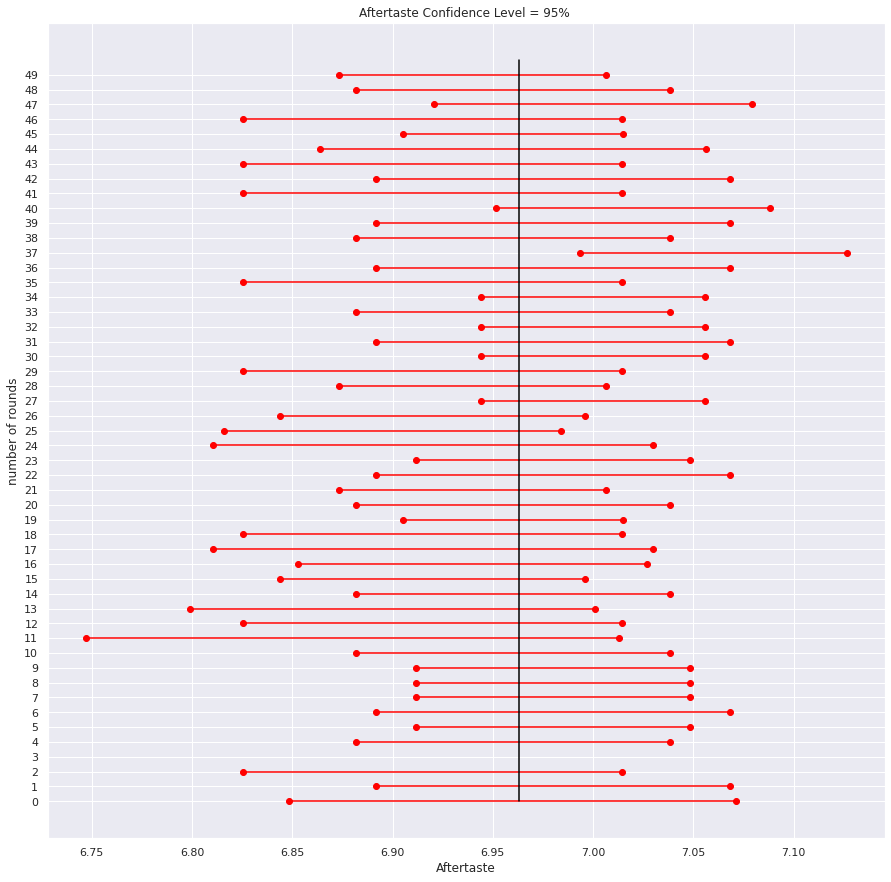

In [ ]:
for lower, upper, y in zip(dataset_95['lower'], dataset_95['upper'], range(len(dataset_95))):
  plt.plot((lower, upper), (y, y), 'ro-', color = 'red')
plt.yticks(range(len(dataset_95)), list(dataset_95['cl']))

point1 = [np.mean(data_clean), 0]
point2 = [np.mean(data_clean), rounds]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color = 'black')
plt.xlabel("Aftertaste")
plt.ylabel("number of rounds")
plt.title("Aftertaste Confidence Level = 95% ")

Text(0.5, 1.0, 'Aftertaste Confidence Level = 99% ')

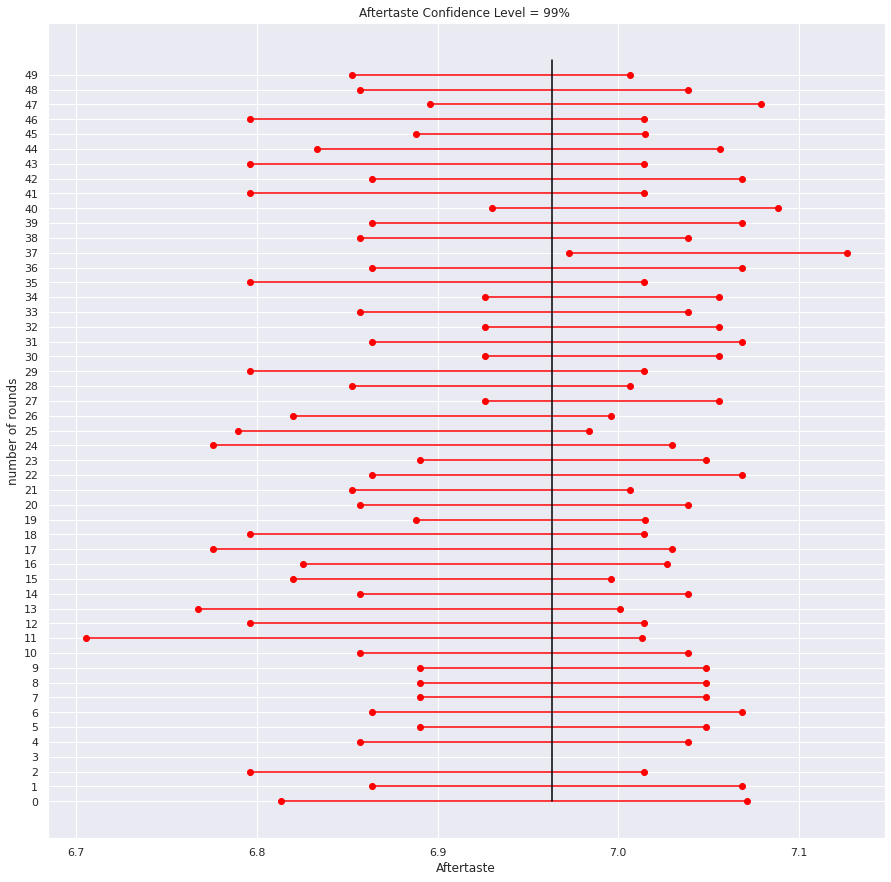

In [ ]:
for lower, upper, y in zip(dataset_99['lower'], dataset_95['upper'], range(len(dataset_99))):
  plt.plot((lower, upper), (y, y), 'ro-', color = 'red')
plt.yticks(range(len(dataset_99)), list(dataset_95['cl']))

point1 = [np.mean(data_clean), 0]
point2 = [np.mean(data_clean), rounds]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, color = 'black')
plt.xlabel("Aftertaste")
plt.ylabel("number of rounds")
plt.title("Aftertaste Confidence Level = 99% ")